In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np

In [8]:
df = pd.read_csv('C:/Users/Rudra Thakar/Jupyter/preprocessed_IFND_dataset.csv')
df.head()

,Unnamed: 0,Statement,Web,Category,Date,Label
0,2,praise india aarogya setu app say helped ident...,dnaindia,COVID-19,Oct-20,TRUE
1,3,delhi deputy u secretary state stephen biegun ...,dnaindia,VIOLENCE,Oct-20,TRUE
2,4,lac tension china strategy behind deliberately...,dnaindia,TERROR,Oct-20,TRUE
3,5,india signed document space cooperation countr...,dnaindia,COVID-19,Oct-20,TRUE
4,6,tamil nadu chief minister mother pass away,dnaindia,ELECTION,Oct-20,TRUE


In [9]:
print("Dataset Info:")
print(df.info())
df.rename(columns={'Unnamed: 0': 'Serial. No'}, inplace=True)
df.rename(columns={'Web': 'News Media'}, inplace=True)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56714 entries, 0 to 56713
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  56714 non-null  int64 
 1   Statement   56714 non-null  object
 2   Web         56714 non-null  object
 3   Category    56714 non-null  object
 4   Date        45393 non-null  object
 5   Label       56714 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.6+ MB
None



Missing Values:
Serial. No        0
Statement         0
News Media        0
Category          0
Date          11321
Label             0
dtype: int64


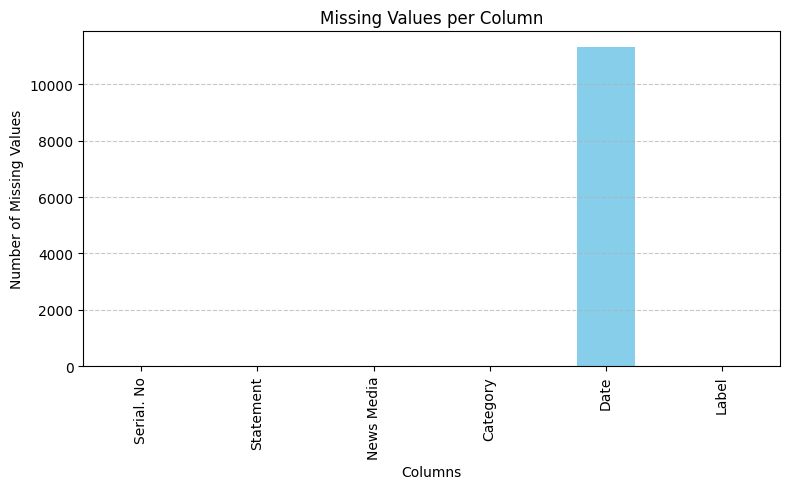

In [10]:
print("\nMissing Values:")
missing_values = df.isnull().sum()
print(missing_values)

plt.figure(figsize=(8, 5))
missing_values.plot(kind='bar', color='skyblue')
plt.title('Missing Values per Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Label Distribution:
Label
TRUE    37800
Fake    18914
Name: count, dtype: int64


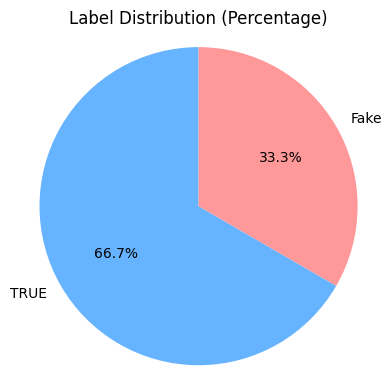

In [12]:
print("\nLabel Distribution:")
label_counts = df['Label'].value_counts()
print(label_counts)

plt.figure(figsize=(4, 4))  # Reduced figure size
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('Label Distribution (Percentage)')
plt.axis('equal')  # Equal aspect ratio ensures pie is a circle
plt.tight_layout()
plt.show()

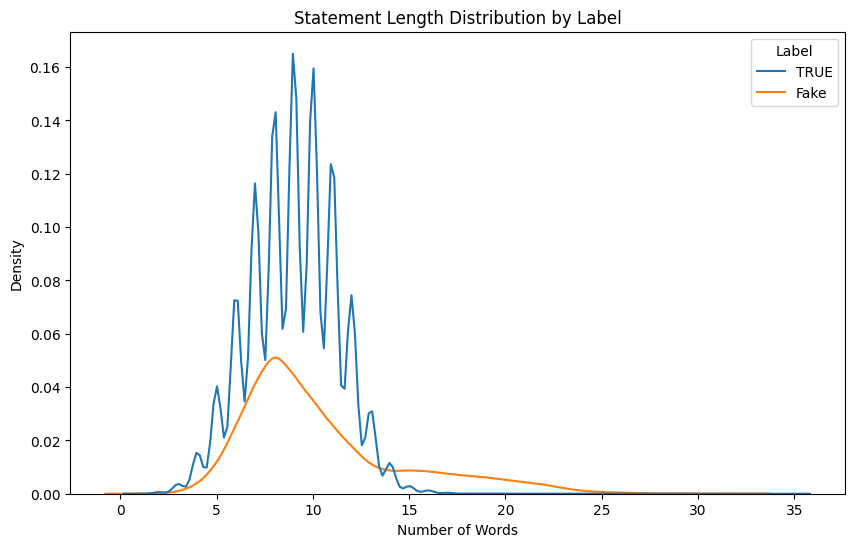

In [26]:
df['Statement_Length'] = df['Statement'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Statement_Length', hue='Label', fill=False)
plt.title('Statement Length Distribution by Label')
plt.xlabel('Number of Words')
plt.ylabel('Density')
plt.show()

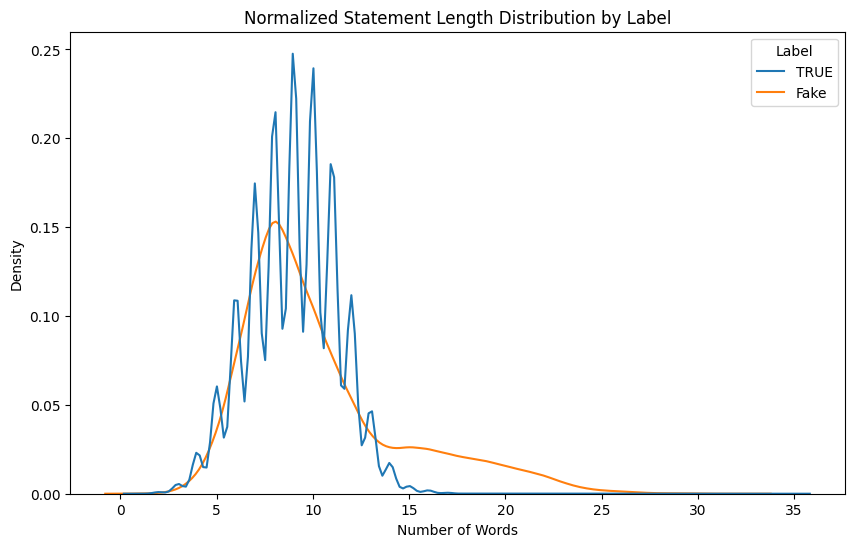

In [21]:
df['Statement_Length'] = df['Statement'].apply(lambda x: len(str(x).split()))

# Normalize the histogram by calculating relative frequencies
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Statement_Length', hue='Label', common_norm=False)
plt.title('Normalized Statement Length Distribution by Label')
plt.xlabel('Number of Words')
plt.ylabel('Density')
plt.show()

Sources Publishing Real News

In [29]:
real_order=df[df['Label']=='TRUE']['News Media'].value_counts().sort_values(ascending=False).index

C:\Users\Rudra Thakar\AppData\Local\Temp\ipykernel_7172\2230413541.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='News Media', data=df[df['Label']=='TRUE'],order=real_order,palette='summer')


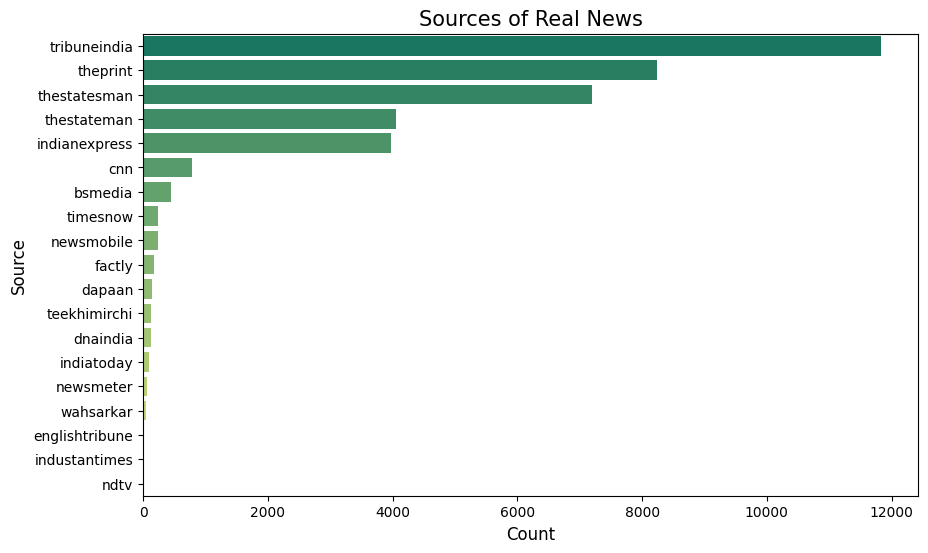

In [31]:
plt.figure(figsize=(10,6))
sns.countplot(y='News Media', data=df[df['Label']=='TRUE'],order=real_order,palette='summer')
plt.xlabel('Count',fontsize=12)
plt.ylabel('Source',fontsize=12)
plt.title('Sources of Real News',fontsize=15)
plt.show()


Sources of Fake News

In [32]:
fake_order=df[df['Label']=='Fake']['News Media'].value_counts().sort_values(ascending=False).index

C:\Users\Rudra Thakar\AppData\Local\Temp\ipykernel_7172\4086440181.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='News Media',data=df[df['Label']=='Fake'],order=fake_order,palette='autumn')


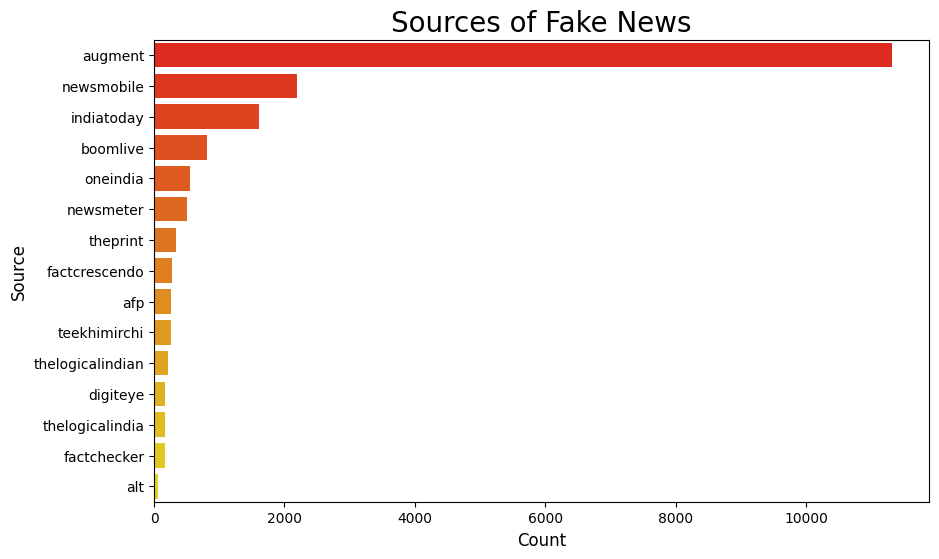

In [34]:
plt.figure(figsize=(10,6))
sns.countplot(y='News Media',data=df[df['Label']=='Fake'],order=fake_order,palette='autumn')
plt.xlabel('Count',fontsize=12)
plt.ylabel('Source',fontsize=12)
plt.title('Sources of Fake News',fontsize=20)
plt.show()

Common Sources of Fake and Real News

In [36]:
new=[]
for x in df[df['Label']=='Fake']['News Media'].unique():
    if x in df[df['Label']=='TRUE']['News Media'].unique():
        new.append(x)
print(new)

['indiatoday', 'theprint', 'newsmeter', 'teekhimirchi', 'newsmobile']


In [38]:
df['common']=df['News Media'].apply(lambda x: x if x in new else 0)

In [39]:
df1=df[df['common']!=0]

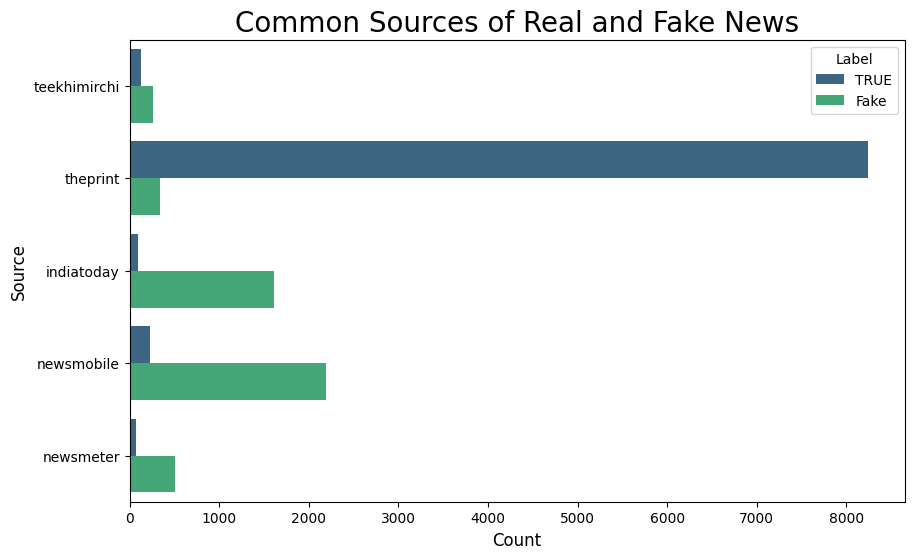

In [40]:
plt.figure(figsize=(10,6))
sns.countplot(y='common',data=df1,hue='Label',palette='viridis')
plt.xlabel('Count',fontsize=12)
plt.ylabel('Source',fontsize=12)
plt.legend(loc='best', title='Label',fontsize=10)
plt.title('Common Sources of Real and Fake News',fontsize=20)
plt.show()

Top 15 Words in TRUE News:
        Word  Count
4      covid   3288
13       say   2959
8      india   2852
0        bjp   2772
1       case   2475
9       modi   2334
7       govt   2228
5      delhi   2021
3   congress   2000
11        pm   1989
2         cm   1167
6     gandhi   1167
14        sc   1165
10       new   1156
12      poll   1123

Top 15 Words in Fake News:
       Word  Count
0     check   9491
2      fact   8516
13    video   4326
14    viral   2799
3      fake   2190
12   shared   1937
8       old   1870
1     claim   1769
10  picture   1378
11       pm   1351
7      modi   1309
9     photo   1309
5     india   1233
4     image   1215
6    indian   1204


C:\Users\Rudra Thakar\AppData\Local\Temp\ipykernel_7172\3766415810.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Word', data=true_df, palette='Blues_d')
C:\Users\Rudra Thakar\AppData\Local\Temp\ipykernel_7172\3766415810.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Word', data=fake_df, palette='Reds_d')


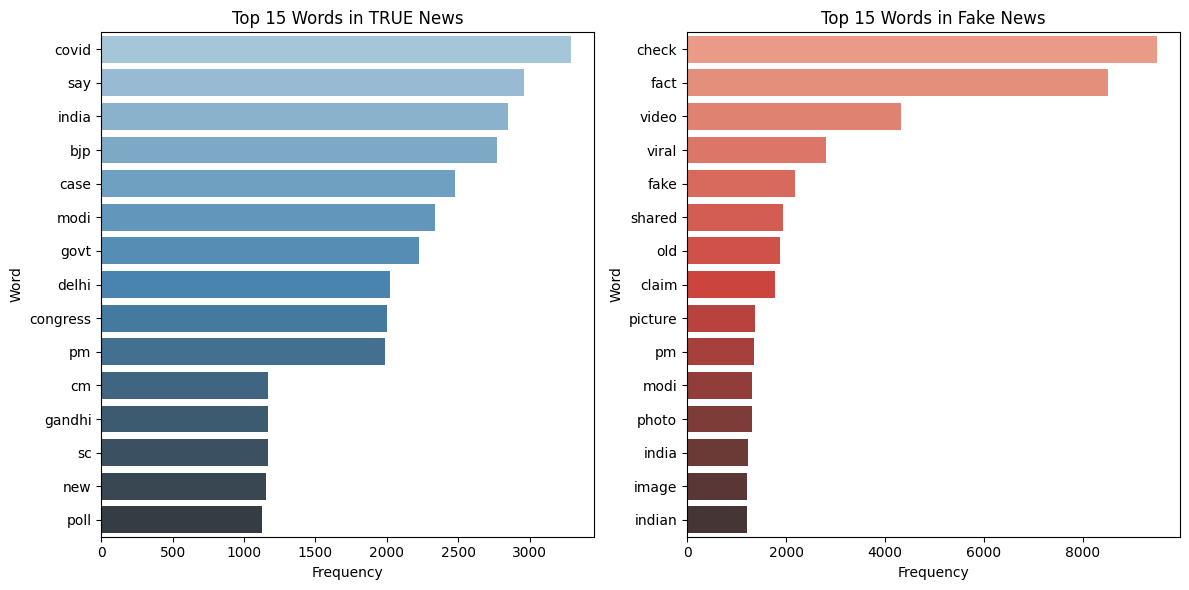

In [41]:
true_statements = df[df['Label'] == 'TRUE']['Statement']
fake_statements = df[df['Label'] == 'Fake']['Statement']  # Adjust 'Fake' to 'FALSE' if needed

# Initialize CountVectorizer (remove stop words for cleaner results)
vectorizer = CountVectorizer(stop_words='english', max_features=15)

# Fit and transform for TRUE statements
true_vectorized = vectorizer.fit_transform(true_statements)
true_word_counts = true_vectorized.toarray().sum(axis=0)
true_words = vectorizer.get_feature_names_out()

# Fit and transform for Fake statements
vectorizer = CountVectorizer(stop_words='english', max_features=15)
fake_vectorized = vectorizer.fit_transform(fake_statements)
fake_word_counts = fake_vectorized.toarray().sum(axis=0)
fake_words = vectorizer.get_feature_names_out()

# Create DataFrames for plotting
true_df = pd.DataFrame({'Word': true_words, 'Count': true_word_counts}).sort_values('Count', ascending=False)
fake_df = pd.DataFrame({'Word': fake_words, 'Count': fake_word_counts}).sort_values('Count', ascending=False)

# Print the top 15 words
print("Top 15 Words in TRUE News:")
print(true_df)
print("\nTop 15 Words in Fake News:")
print(fake_df)

# Plot the results
plt.figure(figsize=(12, 6))

# TRUE News
plt.subplot(1, 2, 1)
sns.barplot(x='Count', y='Word', data=true_df, palette='Blues_d')
plt.title('Top 15 Words in TRUE News')
plt.xlabel('Frequency')
plt.ylabel('Word')

# Fake News
plt.subplot(1, 2, 2)
sns.barplot(x='Count', y='Word', data=fake_df, palette='Reds_d')
plt.title('Top 15 Words in Fake News')
plt.xlabel('Frequency')
plt.ylabel('Word')

plt.tight_layout()
plt.show()